# ADVSTAT MCMC

Using Metropolis Hastings Algorithm


In [187]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
from matplotlib.pylab import *
import csv
import random
%matplotlib inline


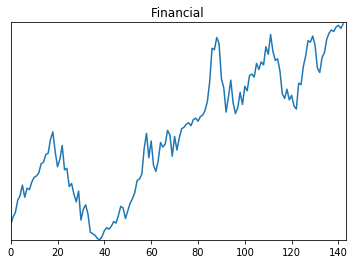

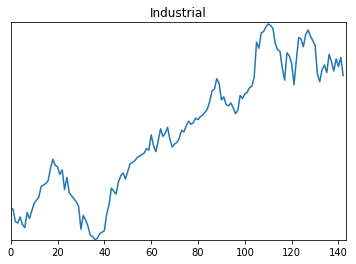

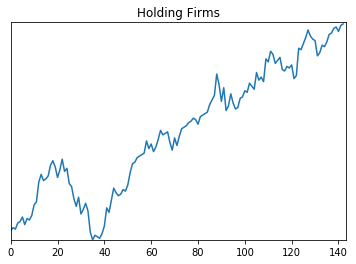

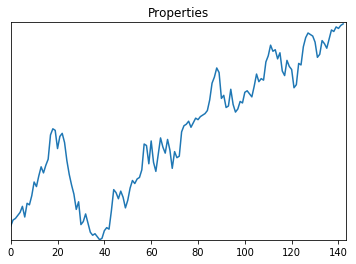

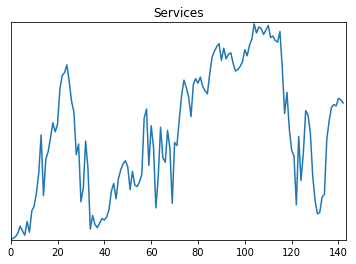

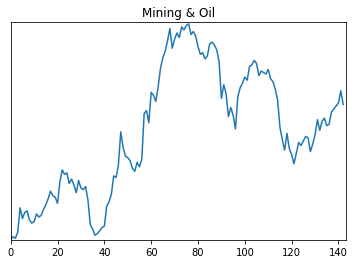

In [202]:
posterior = 0
prior = 0

alldata = []
financials = []
industrials = []
holfirms = []
propty = []
services = []
minoil = []
xaxis = []
xnum = 0
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
with open('stock.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        financials.append(row[0])
        industrials.append(row[1])
        holfirms.append(row[2])
        propty.append(row[3])
        services.append(row[4])
        minoil.append(row[5])
        xaxis.append(xnum)
        xnum = xnum + 1
        #print(row[0])
        

        
#plt.figure(figsize=(20,50))
plt.plot(xaxis, financials)
plt.title('Financial')
plt.yticks([])
plt.axis([0, 143, 0, 143])
plt.show()

plt.plot(xaxis, industrials)
plt.title('Industrial')
plt.yticks([])
plt.axis([0, 143, 0, 143])
plt.show()

plt.plot(xaxis, holfirms)
plt.title('Holding Firms')
plt.yticks([])
plt.axis([0, 143, 0, 143])
plt.show()

plt.plot(xaxis, propty)
plt.title('Properties')
plt.yticks([])
plt.axis([0, 143, 0, 143])
plt.show()

plt.plot(xaxis, services)
plt.title('Services')
plt.yticks([])
plt.axis([0, 143, 0, 143])
plt.show()

plt.plot(xaxis, minoil)
plt.title('Mining & Oil')
plt.yticks([])
plt.axis([0, 143, 0, 143])
plt.show()
alldata.append(financials)
alldata.append(industrials)
alldata.append(holfirms)


In [203]:
#this is for theta for metropolis hasting, check video for more info
oldtheta = np.random.normal(0.5, 0.1, 1)
newtheta = np.random.normal(oldtheta, 0.1, 1)

#so in the case of the video, posterior(newtheta) / posterior(oldtheta)
#then just replace oldtheta with newtheta when needed and then create newtheta using oldtheta again
#NEW CODE STARTS HERE.......................................
def sdnorm(z):
    """
    Standard normal pdf (Probability Density Function)
    """
    return exp(-z*z/2.)/sqrt(2*pi)

In [206]:
#all data contains all arrays of industries(financial, industrial, firms etc..)
for z in xrange(0,1):
    vec = []
    x=0.
    vec.append(x)
    innov =alldata[z]
    xis=[]
    num=0
    num=num+1
    xis.append(num)
    range = len(alldata[z])
    for i in xrange(0,range):
        can = float(innov[i]) #candidate
        oldtheta = np.random.normal(0.5, 0.1, 1)
        newtheta = np.random.normal(oldtheta, 0.1, 1)
        aprob = min([1.,can/newtheta]) #acceptance probability

        u = newtheta
        if u < aprob:
            x = can
            vec.append(x)
            xis.append(num) 
            num=num+1

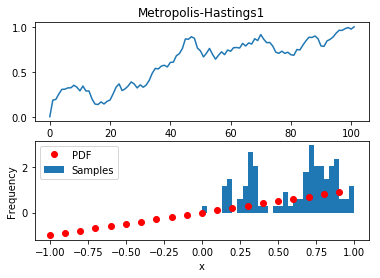

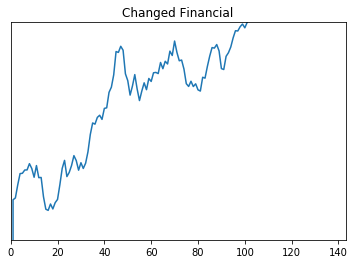

In [207]:
#plotting the results:
#theoretical curve
x = arange(-1,1,.1)
y = x 
subplot(211)
title('Metropolis-Hastings1')
plot(vec)
subplot(212)

hist(vec, bins=30,normed=1)
plot(x,y,'ro')
ylabel('Frequency')
xlabel('x')
legend(('PDF','Samples'))
show()

plt.plot(xis, vec)
plt.title('Changed Financial')
plt.yticks([])
plt.axis([0, 143, 0, 1])
plt.show()